In [67]:
import pandas as pd
import numpy as np
import json
import re

In [3]:
file_dir = './Data'

In [4]:
f'{file_dir}/filename'

'./Data/filename'

In [5]:
with open(f'{file_dir}/wikipedia-movies.json', mode = 'r') as file:
    wiki_movies_raw = json.load(file)

In [6]:
len(wiki_movies_raw)

7311

In [ ]:
#First 5 Records
wiki_movies_raw[:5]

In [10]:
#Last 5 Records
wiki_movies_raw[-5:]

In [8]:
wiki_movies_raw[3600:3605]

In [12]:
kaggle_metadata = pd.read_csv(f'{file_dir}/movies_metadata.csv', low_memory = False)
ratings = pd.read_csv(f'{file_dir}/ratings.csv')

In [16]:
kaggle_metadata.sample(n=5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
44919,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",https://shaftesbury.ca/sadies-last-days-on-earth/,427673,tt5777802,en,Sadie's Last Days on Earth,Everything in high school is like the world en...,...,2016-12-09,0.0,90.0,[],Released,NaN,Sadie's Last Days on Earth,False,5.3,3.0
13216,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,2694,tt0949564,zh,Tuya de hun shi,"Set in Inner Mongolia, a physical setback caus...",...,2006-09-21,0.0,96.0,"[{'iso_639_1': 'zh', 'name': '普通话'}]",Released,NaN,Tuya's Marriage,False,7.6,8.0
29350,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,103199,tt0051090,es,Tizoc,The story of an indigenous who gave his life f...,...,1956-06-15,0.0,109.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,Tizoc,False,4.8,3.0
428,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 53, 'nam...",NaN,18658,tt0109443,en,Clean Slate,Pogue is a private eye with a problem: every m...,...,1994-05-06,7355425.0,107.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Clean Slate,False,5.7,25.0
16210,False,"{'id': 420, 'name': 'The Chronicles of Narnia ...",155000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 10751...",NaN,10140,tt0980970,en,The Chronicles of Narnia: The Voyage of the Da...,"This time around Edmund and Lucy Pevensie, alo...",...,2010-08-13,415686217.0,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Return to magic. Return to hope. Return to Nar...,The Chronicles of Narnia: The Voyage of the Da...,False,6.2,1555.0


In [15]:
ratings.sample(n=5)

,userId,movieId,rating,timestamp
13468885,140054,5219,2.0,1418409725
22077608,229247,1967,3.0,1337625792
19908916,207039,1793,1.5,1227641293
3809399,39710,3801,5.0,1387920805
2838330,29609,52328,3.5,1415362722


In [17]:
# Convert wiki_movies_raw into a DataFrame
wiki_movies_df = pd.DataFrame(wiki_movies_raw)

In [19]:
wiki_movies_df.head()

In [20]:
# convert wiki_movies_df columns to a list
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [22]:
# Use list comprehension to see how many movies are in wiki_movies
wiki_movies = [movie for movie in wiki_movies_raw
              if('Director' in movie or 'Directed by' in movie)
              and 'imdb_link' in movie]
len(wiki_movies)

7080

In [23]:
# Use list comprehension to see No.of.episodes that are not in wiki_movies
wiki_movies = [movie for movie in wiki_movies_raw
              if('Director' in movie or 'Directed by' in movie)
              and 'imdb_link' in movie
              and 'No. of episodes' not in movie]
len(wiki_movies)

7076

In [29]:
# Get the that hold an alternative title
# Make an empty dict to hold all of the alternative titles.
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    
    # Loop through a list of all alternative title keys. combine alternate titles into one list.
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        
        # Check if the current key exists in the movie object.
        if key in movie:
            alt_titles[key] = movie[key]
            # If so, remove the key-value pair and add to the alternative titles dictionary.
            movie.pop(key)
    # After looping through every key, add the alternative titles dict to the movie object.
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles
        
    #merge old_name with new_name creating a new function column_change_name
    def change_column_name(old_name,new_name):
        if old_name in movie:
            movie[new_name]= movie.pop(old_name)
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')

    return movie

In [34]:
#Rerun our list comprehension to clean wiki_movies and recreate wiki_movies_df.
clean_movies = [clean_movie(movie) for movie in wiki_movies]
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [39]:
# Extract IMDb ID into a new column
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
# Print the length before dropping duplicates
print(len(wiki_movies_df))
#Check for duplicates and drop them
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace = True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7076
7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Created by,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [45]:
[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4852],
 ['Starring', 184],
 ['Cinematography', 691],
 ['Release date', 32],
 ['Running time', 139],
 ['Country', 236],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Director', 0],
 ['Distributor', 357],
 ['Editor(s)', 548],
 ['Composer(s)', 518],
 ['Producer(s)', 202],
 ['Production company(s)', 1678],
 ['Writer(s)', 199],
 ['imdb_id', 0]]

In [49]:
len([column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9])


21

In [41]:
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]

In [43]:
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Based on',
 'Starring',
 'Cinematography',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Director',
 'Distributor',
 'Editor(s)',
 'Composer(s)',
 'Producer(s)',
 'Production company(s)',
 'Writer(s)',
 'imdb_id']

In [52]:
#Create Data series that drops missing values for Box office numeric data
box_office = wiki_movies_df['Box office'].dropna()
box_office

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object

In [60]:
#create a is_not_a_string() function.
def is_not_a_string(x):
    return type(x) != str

In [61]:
box_office[box_office.map(is_not_a_string)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [58]:
# creating lambda function right inside the above .map call
box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [87]:
#using join string method to concatenate list items into one string
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

In [91]:
#Regular Expression
form_one = r'\$\d+\.?\d*\s*[mb]illion'

In [92]:
box_office.str.contains(form_one, flags=re.IGNORECASE).sum()

3901

In [93]:
form_two = r"\$\d{1,3}(?:,\d{3})+"
box_office.str.contains(form_two, flags=re.IGNORECASE).sum()

1550

In [94]:
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE)

In [90]:
# this will throw an error!
#box_office[(not matches_form_one) and (not matches_form_two)]

In [95]:
#Using Pandas element-wise logical operators
box_office[~matches_form_one & ~matches_form_two]

79                         $335.000
110              $4.35-4.37 million
600                      $5000 (US)
957                        $ 50,004
1070                     35,254,617
1446                   $ 11,829,959
1480                     £3 million
1611                       $520.000
1865                   ¥1.1 billion
2032                            N/A
2091                           $309
2263          $ 1,223,034(domestic)
2347                       $282.175
2665    926,423 admissions (France)
2823                       $414.000
2924                       $621.000
3088         $32[2]–33.1 million[1]
3631                            TBA
3859             $38.9–40.3 million
3879       CN¥3.650 million (China)
4116                     £7,385,434
4123                       $161.000
4261             $20.7–23.9 million
4306                         $20-30
4492                   $47.7 millon
4561        $45.2k (only in Turkey)
5447                          £2.56
5784                       4

In [96]:
#Some values have spaces in between the dollar sign and the number.
form_one = r'\$\s*\d+\.?\d*\s*[mb]illion'
form_two = r'\$\s*\d{1,3}(?:,\d{3})+'

In [97]:
#Some values use a period as a thousands separator, not a comma.Also,need to add a negative lookahead group that looks
#ahead for "million" or "billion" after the number.
form_two = r'\$\s*\d{1,3}(?:,\d{3})+(?!\s[mb]illion)'

In [100]:
#Some values are given as a range.
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [101]:
#Million" is sometimes misspelled as "millon."
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'

In [103]:
#Extract and Convert the Box Office Values

box_office.str.extract(f'({form_one}|{form_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


In [110]:
#def parse_dollars(s):
    # if s is not a string, return NaN

    # if input is of the form $###.# million

        # remove dollar sign and " million"

        # convert to float and multiply by a million

        # return value

    # if input is of the form $###.# billion

        # remove dollar sign and " billion"

        # convert to float and multiply by a billion

        # return value

    # if input is of the form $###,###,###

        # remove dollar sign and commas

        # convert to float

        # return value

    # otherwise, return NaN
# Since we're working directly with strings, we'll use the re module to access the regular expression functions. 
# We'll use re.match(pattern, string) to see if our string matches a pattern. To start, 
#we'll make some small alterations to the forms we defined, splitting the million and billion matches from form one.

def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"

        # convert to float and multiply by a million

        # return value

    # if input is of the form $###.# billion
        elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"

        # convert to float and multiply by a billion

        # return value

    # if input is of the form $###,###,###
        elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas

        # convert to float

        # return value

    # otherwise, return NaN
    else:
        return np.nan
    


In [ ]:
# Next, we'll use re.sub(pattern, replacement_string, string) to remove dollar signs, spaces, commas, and letters, 
# if necessary.

def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million

        # return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion

        # return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float

        # return value

    # otherwise, return NaN
    else:
        return np.nan

In [111]:
#Finally, convert all the strings to floats, multiply by the right amount, and return the value.
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan

In [119]:
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)
wiki_movies_df['box_office']

0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7071    41900000.0
7072    76100000.0
7073    38400000.0
7074     5500000.0
7075           NaN
Name: box_office, Length: 7033, dtype: float64

In [121]:
#Since box office column is no longer needed we will drop the Box office column.
wiki_movies_df.drop('Box office', axis=1, inplace=True)

In [126]:
#parsing the budget data 
budget = wiki_movies_df['Budget'].dropna()

In [127]:
#Convert any lists to strings:
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

In [128]:
#remove any values between a dollar sign and a hyphen
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [129]:
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE)
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

In [130]:
#Remove the citation references 
budget = budget.str.replace(r'\[\d+\]\s*', '')
budget[~matches_form_one & ~matches_form_two]

<ipython-input-130-e864a917ae17>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  budget = budget.str.replace(r'\[\d+\]\s*', '')


136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973                     $34 million
1126                   $120 million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360                   $150 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034                  $$200 million
5055                   $155 million
5419                    $40 

In [132]:
#parse the budget values
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)
wiki_movies_df['budget']

0       20000000.0
1        6000000.0
2       35000000.0
3       12000000.0
4       25000000.0
           ...    
7071    42000000.0
7072    60000000.0
7073    20000000.0
7074     9000000.0
7075           NaN
Name: budget, Length: 7033, dtype: float64

In [133]:
#Drop the original budget column
wiki_movies_df.drop('Budget', axis=1, inplace=True)

In [136]:
#Parse the release date
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [134]:
#Using the regular expressions parsing release date
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

In [138]:
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,2018
7074,"August 31, 2018"


In [139]:
# using pandas to_datetime()function
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)

In [141]:
#Parsing running time using lambda
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)
running_time

0                                 102 minutes
1                                 114 minutes
2                                 113 minutes
3                                 106 minutes
4                                  95 minutes
                        ...                  
7071                               90 minutes
7072                              132 minutes
7073                              120 minutes
7074                              123 minutes
7075    Variable; 90 minutes for default path
Name: Running time, Length: 6894, dtype: object

In [142]:
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE) != True]


9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [143]:
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE).sum()

6877

In [144]:
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE) != True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [146]:
#match all of the hour + minute patterns with one regular expression pattern.
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

In [147]:
#using to_numeric function
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

In [ ]:
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

In [149]:
#drop Running time from the dataset
wiki_movies_df.drop('Running time', axis=1, inplace=True)

In [162]:
#Clean Kaggle Data
kaggle_metadata.dtypes

belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [164]:
# hecking value if True or False
kaggle_metadata['adult'].value_counts()


In [160]:
# Remove Bad Data
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

In [159]:
#The following code will keep rows where the adult column is False, and then drop the adult column.
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

In [165]:
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [166]:
kaggle_metadata['video'] == True

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

In [167]:
kaggle_metadata['video'] = kaggle_metadata['video'] == True

In [168]:
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [169]:
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

In [170]:
#Ratings data set the null sets option to true
ratings.info(null_counts=True)


<ipython-input-170-1f62cceff723>:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  ratings.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [171]:
#Convert to datetime stamp
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [172]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

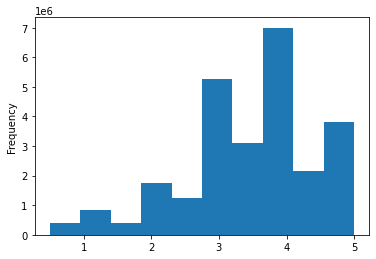

In [173]:
#graph using pandas
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()